### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1. Análisis de facturación



In [43]:
ingreso_total_tienda1 = tienda['Precio'].sum()
ingreso_total_tienda2 = tienda2['Precio'].sum()
ingreso_total_tienda3 = tienda3['Precio'].sum()
ingreso_total_tienda4 = tienda4['Precio'].sum()

In [44]:
print(f'El ingreso total de la tienda 1 es: ${ingreso_total_tienda1}')
print(f'El ingreso total de la tienda 2 es: ${ingreso_total_tienda2}')
print(f'El ingreso total de la tienda 3 es: ${ingreso_total_tienda3}')
print(f'El ingreso total de la tienda 4 es: ${ingreso_total_tienda4}')

El ingreso total de la tienda 1 es: $1150880400.0
El ingreso total de la tienda 2 es: $1116343500.0
El ingreso total de la tienda 3 es: $1098019600.0
El ingreso total de la tienda 4 es: $1038375700.0


Text(0.5, 0, 'Ingreso Total')

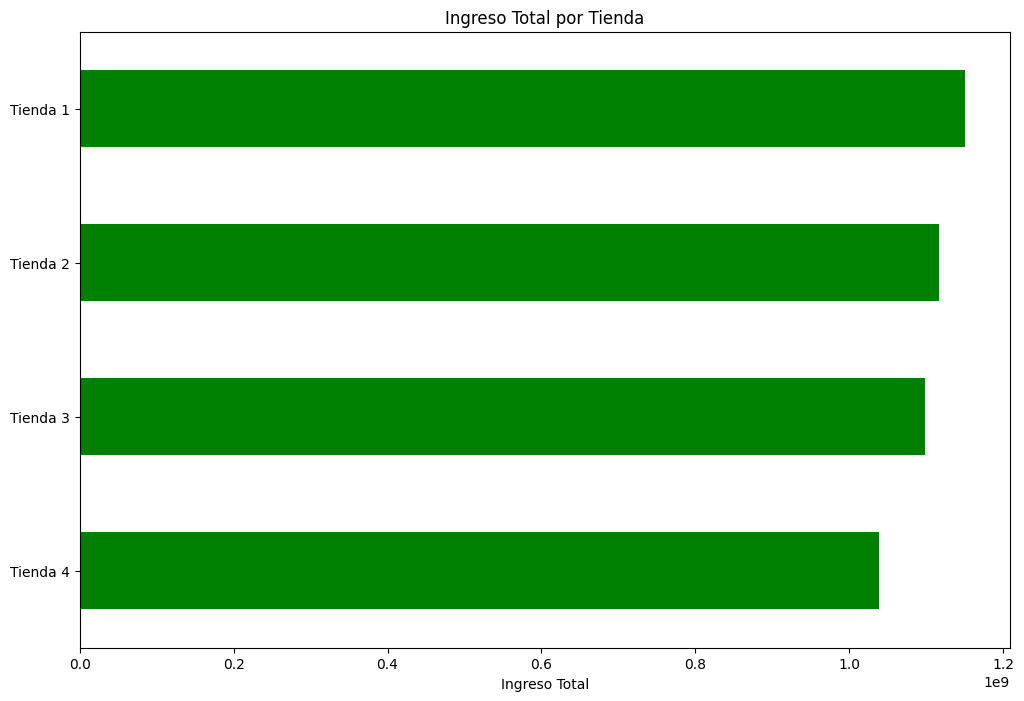

In [48]:
import matplotlib.pyplot as plt

# Create a Series for total revenue
ingreso_total = pd.Series({
    'Tienda 1': ingreso_total_tienda1,
    'Tienda 2': ingreso_total_tienda2,
    'Tienda 3': ingreso_total_tienda3,
    'Tienda 4': ingreso_total_tienda4
})

# Sort and plot
ingreso_total = ingreso_total.sort_values(ascending=True)
ingreso_total.plot(kind='barh', figsize=(12, 8), color='green',
                   title='Ingreso Total por Tienda')
plt.xlabel('Ingreso Total')

# 2. Ventas por categoría

In [5]:
ventas_tienda_1 = tienda.groupby('Categoría del Producto').size().reset_index(name='Ventas Tienda 1')
ventas_tienda_2 = tienda2.groupby('Categoría del Producto').size().reset_index(name='Ventas Tienda 2')
ventas_tienda_3 = tienda3.groupby('Categoría del Producto').size().reset_index(name='Ventas Tienda 3')
ventas_tienda_4 = tienda4.groupby('Categoría del Producto').size().reset_index(name='Ventas Tienda 4')

In [9]:
ventas_totales = ventas_tienda_1.merge(ventas_tienda_2, on='Categoría del Producto', how='outer')
ventas_totales = ventas_totales.merge(ventas_tienda_3, on='Categoría del Producto', how='outer')
ventas_totales = ventas_totales.merge(ventas_tienda_4, on='Categoría del Producto', how='outer')

# Calcular totales y ordenar
ventas_totales['Ventas Totales'] = (ventas_totales['Ventas Tienda 1'] + ventas_totales['Ventas Tienda 2'] + ventas_totales['Ventas Tienda 3'] + ventas_totales['Ventas Tienda 4'])

# Ordenar por popularidad
ventas_totales = ventas_totales.sort_values('Ventas Totales', ascending=False)

# Eliminar la columna de totales si no la quieres mostrar
ventas_totales = ventas_totales.drop('Ventas Totales', axis=1)
ventas_totales

,Categoría del Producto,Ventas Tienda 1,Ventas Tienda 2,Ventas Tienda 3,Ventas Tienda 4
7,Muebles,465,442,499,480
3,Electrónicos,448,422,451,451
5,Juguetes,324,313,315,338
2,Electrodomésticos,312,305,278,254
1,Deportes y diversión,284,275,277,277
4,Instrumentos musicales,182,224,177,170
6,Libros,173,197,185,187
0,Artículos para el hogar,171,181,177,201


In [31]:
ventas_totales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 7 to 0
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Categoría del Producto  8 non-null      object
 1   Ventas Tienda 1         8 non-null      int64 
 2   Ventas Tienda 2         8 non-null      int64 
 3   Ventas Tienda 3         8 non-null      int64 
 4   Ventas Tienda 4         8 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 384.0+ bytes


<Axes: title={'center': 'Ventas por Categoría en todas las tiendas'}, ylabel='Categoría del Producto'>

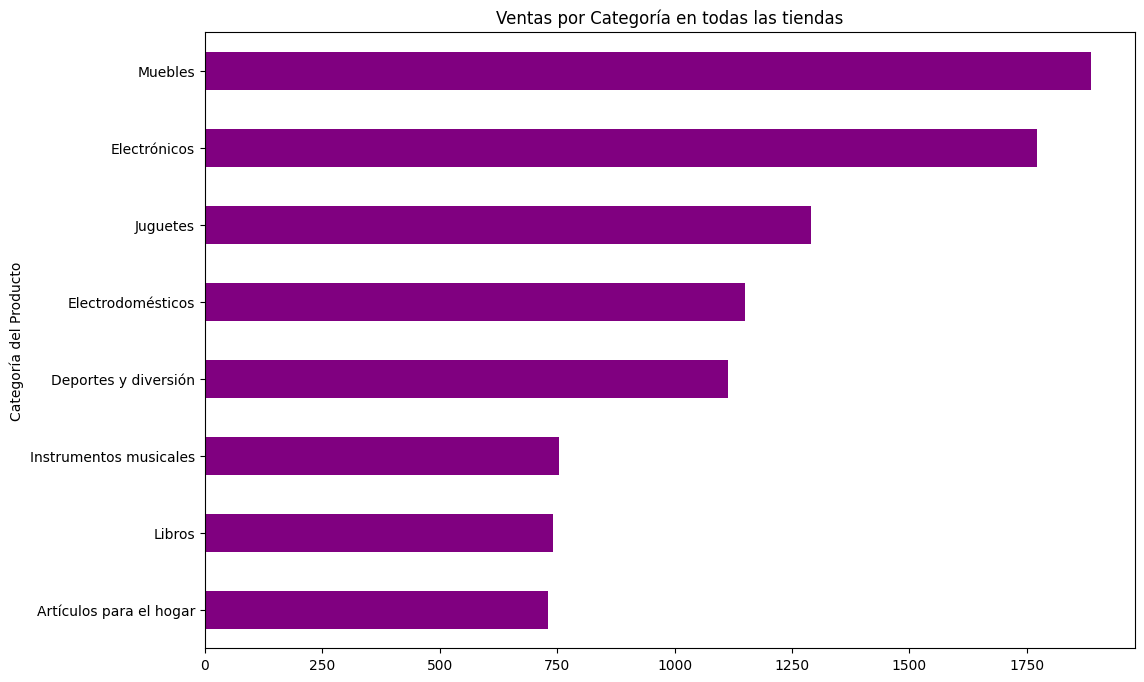

In [42]:
# Recalculate 'Ventas Totales' as it was dropped in a previous step
ventas_totales['Ventas Totales'] = ventas_totales[['Ventas Tienda 1', 'Ventas Tienda 2', 'Ventas Tienda 3', 'Ventas Tienda 4']].sum(axis=1)

# Group by 'Categoría del Producto' and select 'Ventas Totales', then sort
ventas_categoria = ventas_totales.set_index('Categoría del Producto')['Ventas Totales'].sort_values(ascending=True)

ventas_categoria.plot(kind='barh', figsize=(12,8), color='purple', title='Ventas por Categoría en todas las tiendas')

# 3. Calificación promedio de la tienda


In [10]:
calificacion_promedio_tienda1 = tienda['Calificación'].mean() #Para saber el promedio
calificacion_promedio_tienda2 = tienda2['Calificación'].mean()
calificacion_promedio_tienda3 = tienda3['Calificación'].mean()
calificacion_promedio_tienda4 = tienda4['Calificación'].mean()

In [11]:
print(f'Calificación promedio Tienda 1: {calificacion_promedio_tienda1:.2f}')
print(f'Calificación promedio Tienda 2: {calificacion_promedio_tienda2:.2f}')
print(f'Calificación promedio Tienda 3: {calificacion_promedio_tienda3:.2f}')
print(f'Calificación promedio Tienda 4: {calificacion_promedio_tienda4:.2f}')

Calificación promedio Tienda 1: 3.98
Calificación promedio Tienda 2: 4.04
Calificación promedio Tienda 3: 4.05
Calificación promedio Tienda 4: 4.00


<Axes: title={'center': 'Calificación Promedio por Tienda'}>

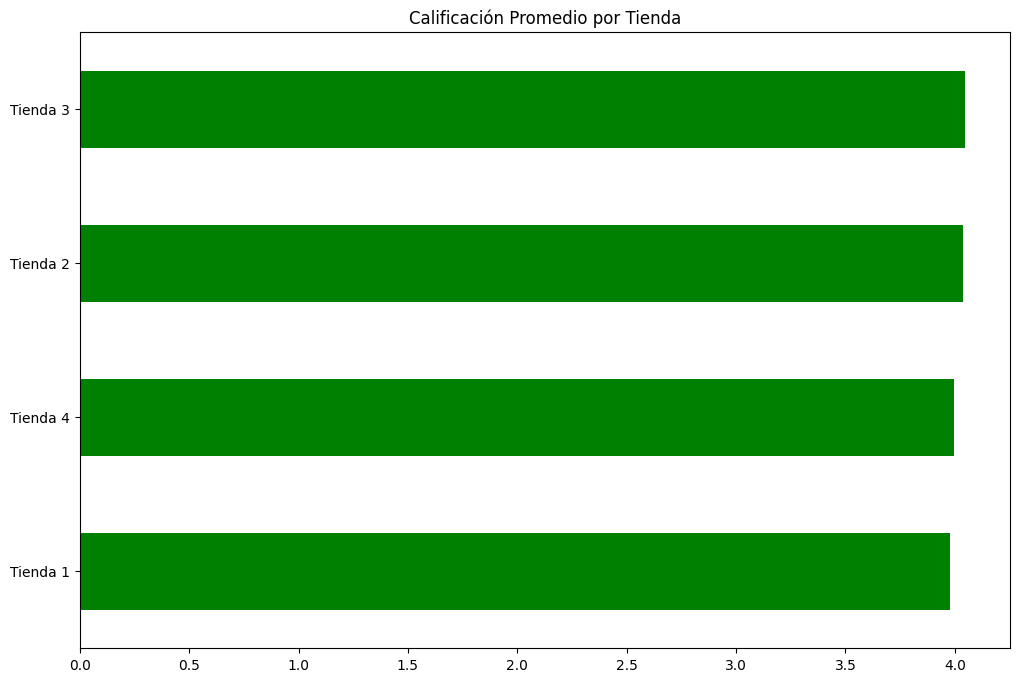

In [40]:

# Create a Series for average ratings
calificaciones_promedio = pd.Series({
    'Tienda 1': calificacion_promedio_tienda1,
    'Tienda 2': calificacion_promedio_tienda2,
    'Tienda 3': calificacion_promedio_tienda3,
    'Tienda 4': calificacion_promedio_tienda4
})

# Sort the values for better visualization (optional, but good practice)
calificaciones_promedio = calificaciones_promedio.sort_values(ascending=True)

# Plot the average ratings
calificaciones_promedio.plot(kind='barh', figsize=(12, 8), color='green', title='Calificación Promedio por Tienda')


# 4. Productos más y menos vendidos

In [ ]:
ventas_tienda_1 = tienda.groupby('Categoría del Producto').size().reset_index(name='Ventas Tienda 1')
ventas_tienda_2 = tienda2.groupby('Categoría del Producto').size().reset_index(name='Ventas Tienda 2')
ventas_tienda_3 = tienda3.groupby('Categoría del Producto').size().reset_index(name='Ventas Tienda 3')
ventas_tienda_4 = tienda4.groupby('Categoría del Producto').size().reset_index(name='Ventas Tienda 4')
ventas_totales = ventas_tienda_1.merge(ventas_tienda_2, on='Categoría del Producto', how='outer')
ventas_totales = ventas_totales.merge(ventas_tienda_3, on='Categoría del Producto', how='outer')
ventas_totales = ventas_totales.merge(ventas_tienda_4, on='Categoría del Producto', how='outer')

# Calcular totales y ordenar
ventas_totales['Ventas Totales'] = (ventas_totales['Ventas Tienda 1'] + ventas_totales['Ventas Tienda 2'] + ventas_totales['Ventas Tienda 3'] + ventas_totales['Ventas Tienda 4'])

# Ordenar por popularidad
ventas_totales = ventas_totales.sort_values('Ventas Totales', ascending=False)

# Eliminar la columna de totales si no la quieres mostrar
ventas_totales = ventas_totales.drop('Ventas Totales', axis=1)
ventas_totales

In [27]:

producto_menos_vendido_tienda1 = tienda['Producto'].value_counts().idxmin()
producto_mas_vendido_tienda1 = tienda['Producto'].value_counts().idxmax()

producto_menos_vendido_tienda2 = tienda2['Producto'].value_counts().idxmin()
producto_mas_vendido_tienda2 = tienda2['Producto'].value_counts().idxmax()

producto_menos_vendido_tienda3 = tienda3['Producto'].value_counts().idxmin()
producto_mas_vendido_tienda3 = tienda3['Producto'].value_counts().idxmax()

producto_menos_vendido_tienda4 = tienda4['Producto'].value_counts().idxmin()
producto_mas_vendido_tienda4 = tienda4['Producto'].value_counts().idxmax()

In [28]:
print(f'Producto menos vendido Tienda 1: {producto_menos_vendido_tienda1}')
print(f'Producto mas vendido Tienda 1: {producto_mas_vendido_tienda1}\n')

print(f'Producto menos vendido Tienda 2: {producto_menos_vendido_tienda2}')
print(f'Producto mas vendido Tienda 2: {producto_mas_vendido_tienda2}\n')

print(f'Producto menos vendido Tienda 3: {producto_menos_vendido_tienda3}')
print(f'Producto mas vendido Tienda 3: {producto_mas_vendido_tienda3}\n')

print(f'Producto menos vendido Tienda 4: {producto_menos_vendido_tienda4}')
print(f'Producto mas vendido Tienda 4: {producto_mas_vendido_tienda4}\n')

Producto menos vendido Tienda 1: Auriculares con micrófono
Producto mas vendido Tienda 1: Microondas

Producto menos vendido Tienda 2: Juego de mesa
Producto mas vendido Tienda 2: Iniciando en programación

Producto menos vendido Tienda 3: Bloques de construcción
Producto mas vendido Tienda 3: Kit de bancas

Producto menos vendido Tienda 4: Guitarra eléctrica
Producto mas vendido Tienda 4: Cama box



# 5. Envío promedio por tienda

In [29]:
envio_promedio_tienda1 = tienda['Costo de envío'].mean()
envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
envio_promedio_tienda4 = tienda4['Costo de envío'].mean()

In [30]:
print(f'Costo de envío promedio Tienda 1: ${envio_promedio_tienda1:.2f}')
print(f'Costo de envío promedio Tienda 2: ${envio_promedio_tienda2:.2f}')
print(f'Costo de envío promedio Tienda 3: ${envio_promedio_tienda3:.2f}')
print(f'Costo de envío promedio Tienda 4: ${envio_promedio_tienda4:.2f}')

Costo de envío promedio Tienda 1: $26018.61
Costo de envío promedio Tienda 2: $25216.24
Costo de envío promedio Tienda 3: $24805.68
Costo de envío promedio Tienda 4: $23459.46


<Axes: title={'center': 'Envio Promedio por Tienda'}>

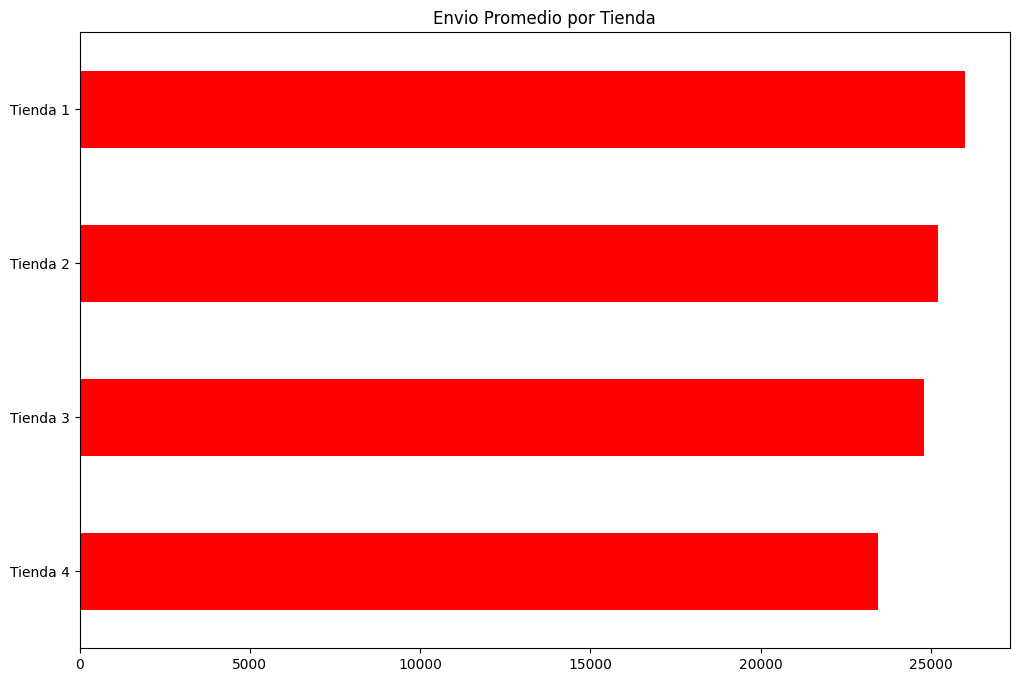

In [41]:
envio_promedio = pd.Series({
    'Tienda 1': envio_promedio_tienda1,
    'Tienda 2': envio_promedio_tienda2,
    'Tienda 3': envio_promedio_tienda3,
    'Tienda 4': envio_promedio_tienda4
})

envio_promedio = envio_promedio.sort_values(ascending=True)

envio_promedio.plot(kind='barh', figsize=(12, 8), color='red', title='Envio Promedio por Tienda')

Con base en los análisis realizados y los gráficos generados anteriormente nos damos un panorama más detallado de lo que pasa en cada tienda y lo que implica cada coste de cada una de ellas, así con el análisis ya hecho podemos dictaminar cuál de las cuatro tiendas se tendrá que quitar para emprender un nuevo negocio.

En el primer apartado nos damos cuenta de que la **tienda uno es la que más ingresos** ha generado con los datos que nos proporcionaron, así como primer dato importante es saber que la tienda **1 es la que mayor ingreso** tiene y que la **tienda 4 es la que menos** ha generado.

En el segundo apartado nos damos cuenta de que la venta total de que los **muebles es la categoria que es mas vendida** en las cuatro tiendas y los artículos del hogar es lo menos que se vende, este es nuestro segundo dato en este análisis.

Como tercer apartado, nos damos cuenta de que la t**ienda 3 es la que más puntuación** tiene y que la **tienda 1 es la que peor puntación tiene**, con estos datos puede decirse que la tienda 1 es la que más vende, pero la que menos valoración tiene según los clientes.

En el cuarto apartado vemos que tenemos un **promedio de los productos que más se venden y menos se venden en cada tienda**, es un dato importante, asi que lo analizaremos con mas calma al final de este conteo de resultados.

Como quinto punto tenemos el dato del **costo de envió promedio por tienda**, que en este caso la **tienda 1 es la que más tiene el costo de envío** y la **tienda 4 es la que menos** cobra por envío.

Como análisis final y con los resultados obtenidos podemos decir que puede que la tienda uno tenga menor calificación por el costo promedio de envío de la tienda, pero que en ella se ve reflejado un gran número de flujo de dinero, aunque no tenga buena calificación de parte de los clientes, en este caso sólo serpia modificar el costo de envío para que los clientes mejoren su calificación en la tienda.

Y con los demás datos podemos decir que la tienda 4 es la que menos genera ganancia, tiene una puntuación maso menos y que es la que menos cobra por envío, aunque estas últimas dos partes son positivas, el que genere menos que las otras con un margen considerable, se puede decir que no es rentable seguir con la tienda 4 aunque esta maso menos este calificada y su coste de envío es menor, es porque no genera lo suficiente como para querer cobrar más por sus envíos.


